## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combined_df

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseid_duplicates = combined_df[combined_df.duplicated(["Mouse ID"])]
mouseid_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mice) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = len(clean_df["Mouse ID"].unique())
new_mouse_count

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


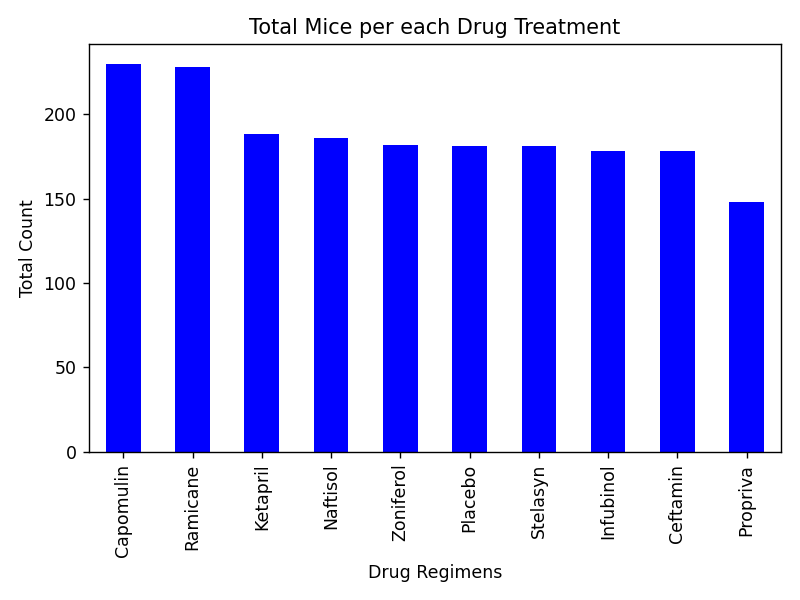

In [28]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
%matplotlib notebook

mouse_count=clean_df["Drug Regimen"].value_counts()
y_axis=mouse_count.values
x_axis=mouse_count.index
mouse_count.plot(kind="bar", facecolor='blue',)
plt.ylabel("Total Count")
plt.xlabel("Drug Regimens")
plt.title("Total Mice per each Drug Treatment")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()


plt.savefig("../Images/pandas_bar.png")

<IPython.core.display.Javascript object>


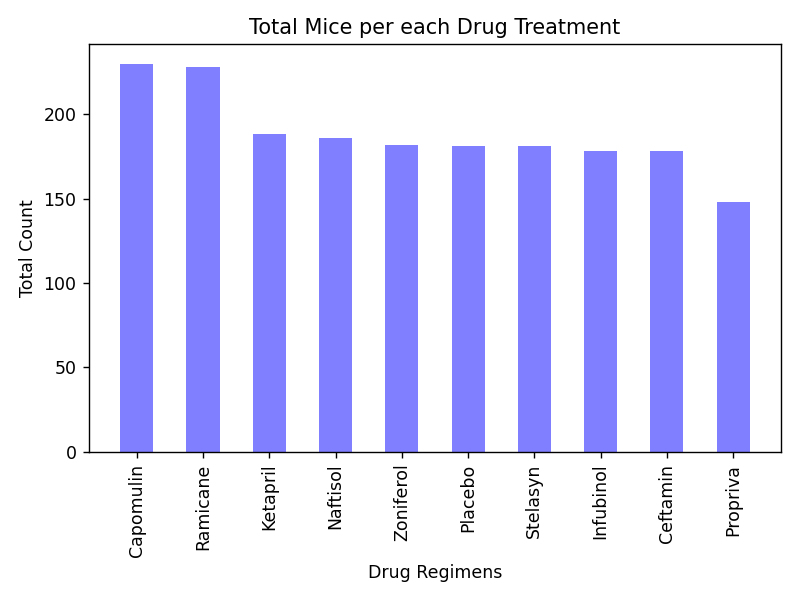

In [29]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
%matplotlib notebook

mouse_count_df= clean_df["Drug Regimen"].value_counts()
y_axis= mouse_count_df.values
x_axis= np.arange(0,len(y_axis),1)
drug_names= mouse_count_df.index
plt.bar(drug_names, y_axis, color='blue', alpha=0.5, align= "center", width= .5)
plt.ylabel("Total Count")
plt.xlabel("Drug Regimens")
plt.title("Total Mice per each Drug Treatment")
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()


plt.savefig("../Images/pyplot_bar.png")

<IPython.core.display.Javascript object>


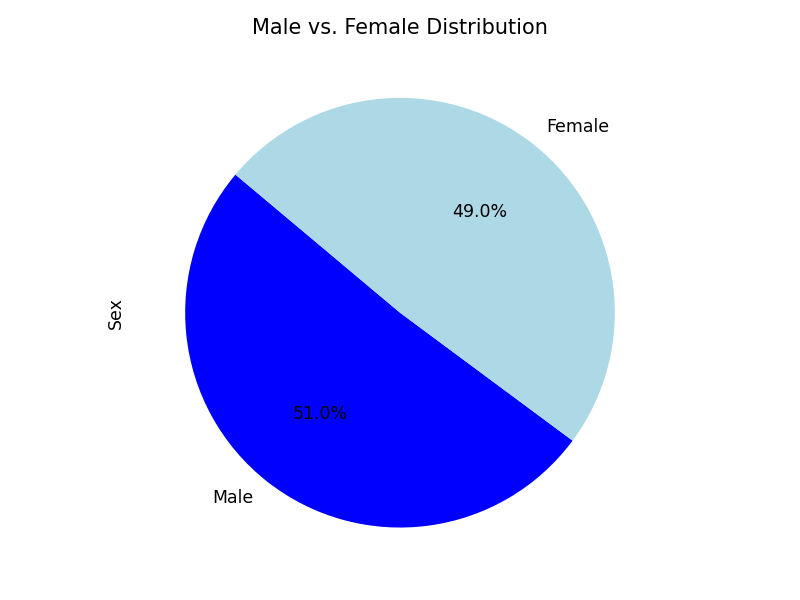

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib notebook

gender_groups=clean_df["Sex"].value_counts()
labels=gender_groups.values
sizes=gender_groups.values
gender_groups.plot(kind="pie", colors=["blue", "lightblue"], autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Male vs. Female Distribution")
plt.ylabel("Sex")

plt.show()
plt.tight_layout()

plt.savefig("../Images/pandas_pie.png")

<IPython.core.display.Javascript object>


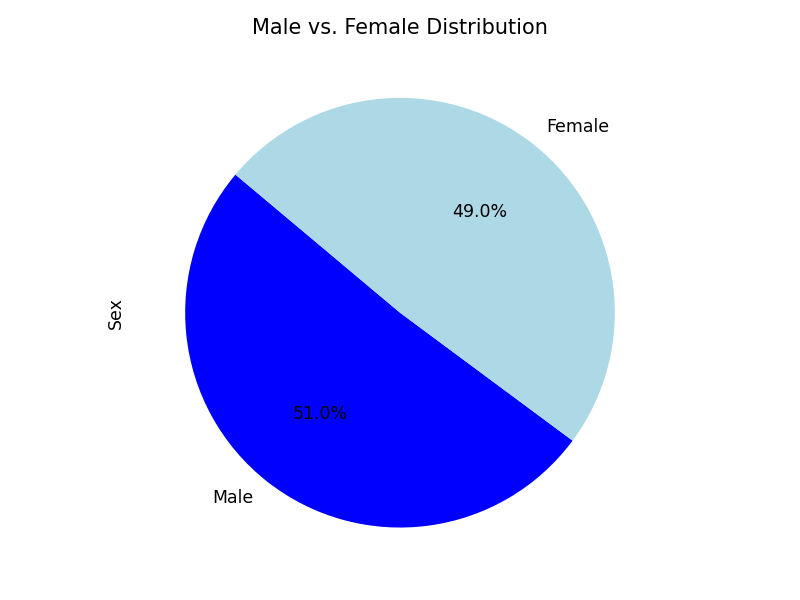

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook 


gender_distribution=clean_df["Sex"].value_counts()

labels=gender_distribution.index 
sizes=gender_distribution.values

plt.pie(sizes, labels=labels, colors=["blue", "lightblue"], autopct="%1.1f%%", shadow=False, startangle=140)

plt.title("Male vs. Female Distribution")
plt.ylabel("Sex")

plt.show()
plt.tight_layout()

plt.savefig("../Images/pyplot.pie.png")

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_greatest = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
tumor_greatest = tumor_greatest.sort_values(["Timepoint"], ascending=False)
tumor_greatest
merged_df = tumor_greatest[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
merged_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    # add subset 
    # Determine outliers using upper and lower bounds

capomulin= merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

#Capomulin
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr_cap= upper_cap-lower_cap
lowout_cap= lower_cap-(1.5*iqr_cap)
upout_cap= upper_cap+(1.5*iqr_cap)

#Ramicane
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr_ram= upper_ram-lower_ram
lowout_ram= lower_ram-(1.5*iqr_ram)
upout_ram= upper_ram+(1.5*iqr_ram)

#Infubinol
quartile_inbol= infubinol.quantile([.25,.5,.75])
lower_inbol= quartile_inbol[.25]
upper_inbol=quartile_inbol[.75]
iqr_inbol= upper_inbol-lower_inbol
lowout_inbol= lower_inbol-(1.5*iqr_inbol)
upout_inbol= upper_inbol+(1.5*iqr_inbol)

#Ceftamin
quartile_ceft= ceftamin.quantile([.25,.5,.75])
lower_ceft= quartile_ceft[.25]
upper_ceft=quartile_ceft[.75]
iqr_ceft= upper_ceft-lower_ceft
lowout_ceft= lower_ceft-(1.5*iqr_ceft)
upout_ceft= upper_ceft+(1.5*iqr_ceft)

<IPython.core.display.Javascript object>


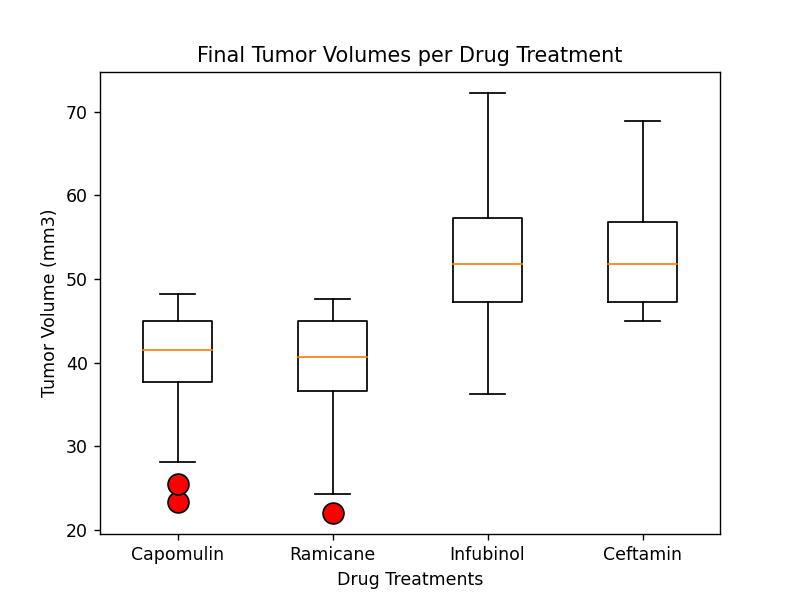

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
%matplotlib notebook

boxedplot = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= boxedplot)
plt.title("Final Tumor Volumes per Drug Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Treatments")
plt.show()

plt.savefig("../Images/boxplot.png")

## Line and Scatter Plots

<IPython.core.display.Javascript object>


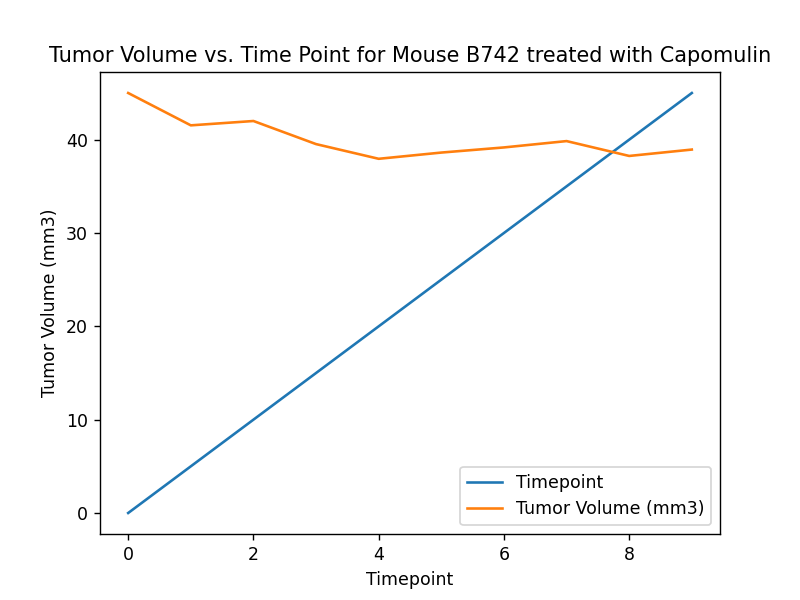

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = clean_df[clean_df["Mouse ID"].isin(["b742"])]
mouse_capomulin

time_tumor_data = mouse_capomulin[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_tumor_data

timetumor_df = time_tumor_data.reset_index()
timetumor_df

timetumor_lineplot_df = timetumor_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timetumor_lineplot_df

timetumor_lineplot_df.plot.line()

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for Mouse B742 treated with Capomulin")

plt.savefig("../Images/lineplot.png")

<IPython.core.display.Javascript object>


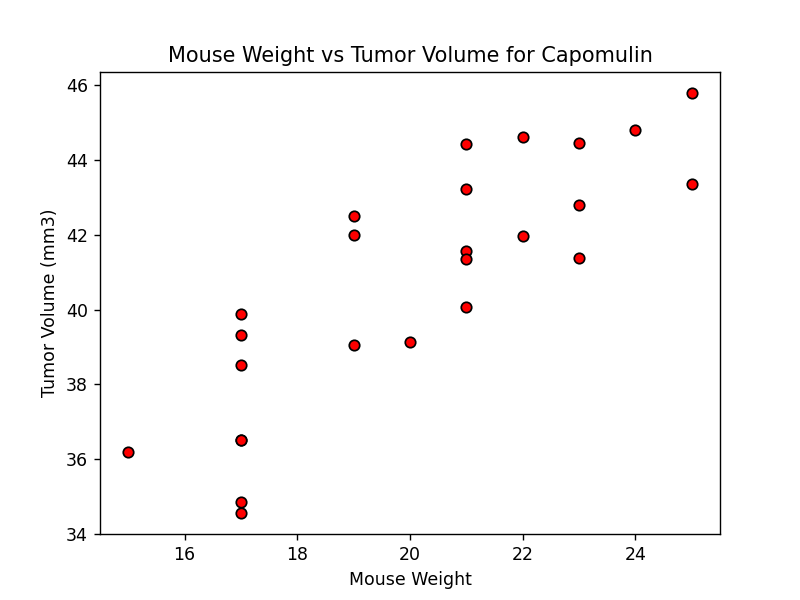

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook

captabs= clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capmean=captabs.groupby(["Mouse ID"]).mean()
plt.scatter(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"],facecolors="red", edgecolors="black")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.show()

plt.savefig("../Images/scatter.png")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


<IPython.core.display.Javascript object>


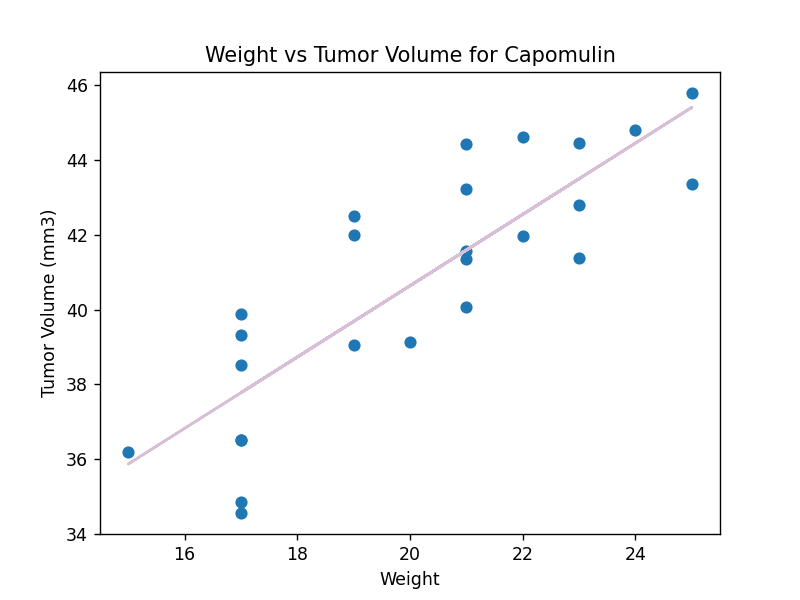

In [37]:
%matplotlib notebook
from scipy.stats import linregress

(slope, intercept,rvalue, pvalue, stderr)= linregress(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"])
regress_values=capmean["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"] )
plt.plot(capmean["Weight (g)"], regress_values, color='thistle')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

plt.savefig("../Images/regression.png")